# Import Dependencies 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [36]:
# Load the dataset
import pandas as pd
import os

# Go up one level from notebooks/ and into src/
csv_path = os.path.join('..', 'src', 'benin-malanville.csv')

# Read the CSV
df = pd.read_csv(csv_path)


In [11]:
# 1. Summary Statistics & Missing-Value Report
print(df.describe())
missing_values = df.isna().sum()/len(df)*100
print(missing_values[missing_values > 5])

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [15]:
import numpy as np
from scipy import stats

numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Create a copy to safely handle missing values
subset = df[numeric_cols].copy()

# Fill or drop NaNs as needed (e.g., forward-fill or drop for Z-score)
subset_clean = subset.dropna()

# Compute Z-scores
z_scores = np.abs(stats.zscore(subset_clean))

# Detect outliers
outliers_mask = (z_scores > 3).any(axis=1)

# Get actual outlier rows from original df (align index)
outlier_indices = subset_clean.index[outliers_mask]
outliers_df = df.loc[outlier_indices]


In [35]:
import numpy as np
import pandas as pd
from scipy import stats

# Step 1: Define numeric columns
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Step 2: Drop rows with NaNs only for Z-score calculation
df_clean = df[numeric_cols].dropna()

# Step 3: Calculate Z-scores
z_scores = np.abs(stats.zscore(df_clean))

# Step 4: Detect rows where any feature has Z-score > 3
outliers = (z_scores > 3).any(axis=1)

# Step 5: Align with original df
# Create a full-length boolean Series (True for outliers)
outlier_flags = pd.Series(False, index=df.index)
outlier_flags[df_clean.index] = outliers

# Step 6: Mark clean rows with a flag
df['clean_flag'] = ~outlier_flags


In [24]:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [25]:
df.fillna({col: df[col].median()}, inplace=True)


In [26]:
# Export cleaned data
import os

os.makedirs('src/data', exist_ok=True)
df.to_csv('src/data/benin_clean.csv', index=False)


In [27]:
# Export cleaned data
df.to_csv('src/data/benin_clean.csv', index=False)


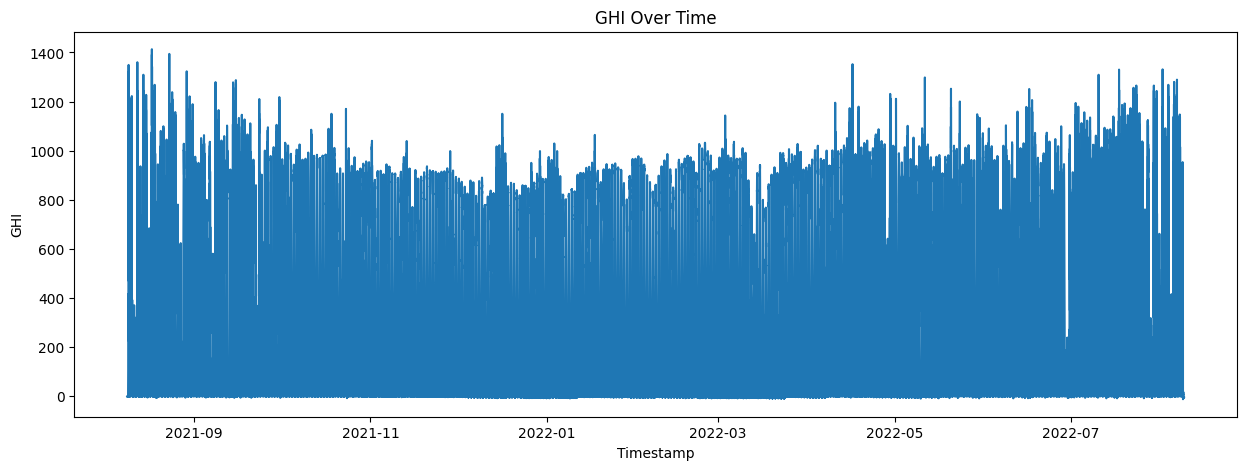

In [30]:
# 3. Time Series Analysis
import matplotlib.pyplot as plt
import seaborn as sns  # since you're also using seaborn

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='Timestamp', y='GHI')
plt.title('GHI Over Time')
plt.show()

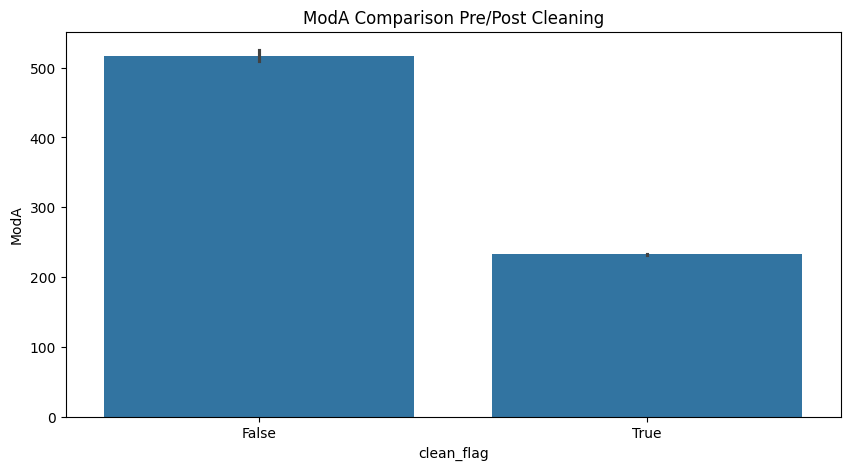

In [31]:
# 4. Cleaning Impact
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='clean_flag', y='ModA')
plt.title('ModA Comparison Pre/Post Cleaning')
plt.show()

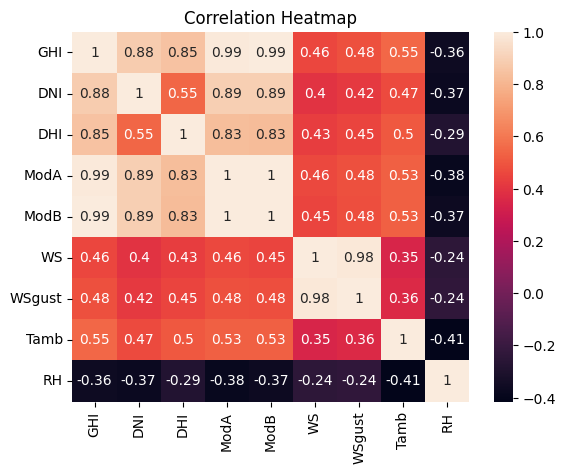

In [32]:
# 5. Correlation Analysis
corr_matrix = df[numeric_cols + ['Tamb', 'RH']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

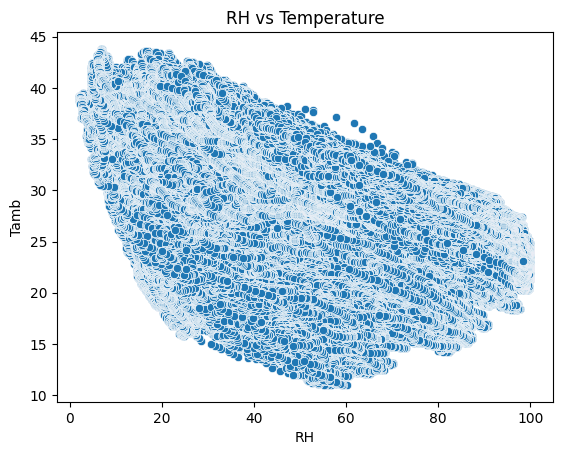

In [33]:
# 6. Wind Analysis
# (Include wind rose code using matplotlib or specialized library)
# 7. Temperature Analysis
sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title('RH vs Temperature')
plt.show()

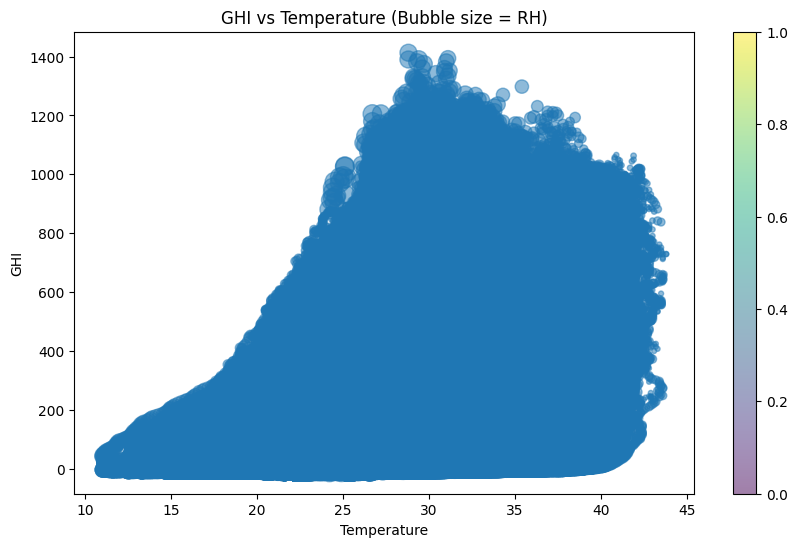

In [34]:
# 8. Bubble Chart
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*2, alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('GHI')
plt.title('GHI vs Temperature (Bubble size = RH)')
plt.colorbar()
plt.show()